<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/lab05_AutoMPG_BJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 전처리

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pwd

/content


In [4]:
!ls

auto-mpg.data-original.csv  sample_data


In [33]:
data=pd.read_csv('auto-mpg.data-original.csv',names=['mpg','cylinders','displacement','HP','weight','acceleration','year','origin','car name'])

In [9]:
data.head()

,mpg,cylinders,displacement,HP,weight,acceleration,year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [10]:
data.describe()

,mpg,cylinders,displacement,HP,weight,acceleration,year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
data.tail(3)

,mpg,cylinders,displacement,HP,weight,acceleration,year,origin,car name
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
405,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   HP            400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   year          406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


# 년도 수정

In [16]:
import datetime as dt

In [35]:
data['year']


0      70
1      70
2      70
3      70
4      70
       ..
401    82
402    82
403    82
404    82
405    82
Name: year, Length: 406, dtype: int64

In [39]:
data['year']=pd.to_datetime(data['year'],format='%y').dt.year

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   HP            400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   year          406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


In [42]:
data['year']

0      1970
1      1970
2      1970
3      1970
4      1970
       ... 
401    1982
402    1982
403    1982
404    1982
405    1982
Name: year, Length: 406, dtype: int64

# 원산지 데이터 변환

In [48]:
data['origin']=data['origin'].astype('category')

In [49]:
data['origin']

0      1
1      1
2      1
3      1
4      1
      ..
401    1
402    2
403    1
404    1
405    1
Name: origin, Length: 406, dtype: category
Categories (3, int64): [1, 2, 3]

In [50]:
data['origin'].cat.categories=['USA','EU','JAP']

In [51]:
data['origin']

0      USA
1      USA
2      USA
3      USA
4      USA
      ... 
401    USA
402     EU
403    USA
404    USA
405    USA
Name: origin, Length: 406, dtype: category
Categories (3, object): ['USA', 'EU', 'JAP']

In [52]:
data.head()

,mpg,cylinders,displacement,HP,weight,acceleration,year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,1970,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970,USA,ford torino


In [55]:
data.tail()

,mpg,cylinders,displacement,HP,weight,acceleration,year,origin,car name
401,27.0,4,140.0,86.0,2790,15.6,1982,USA,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,1982,EU,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,1982,USA,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,1982,USA,ford ranger
405,31.0,4,119.0,82.0,2720,19.4,1982,USA,chevy s-10


# 시각화

In [56]:
import seaborn as sns

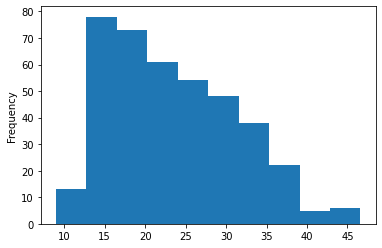

In [58]:
data['mpg'].plot.hist()

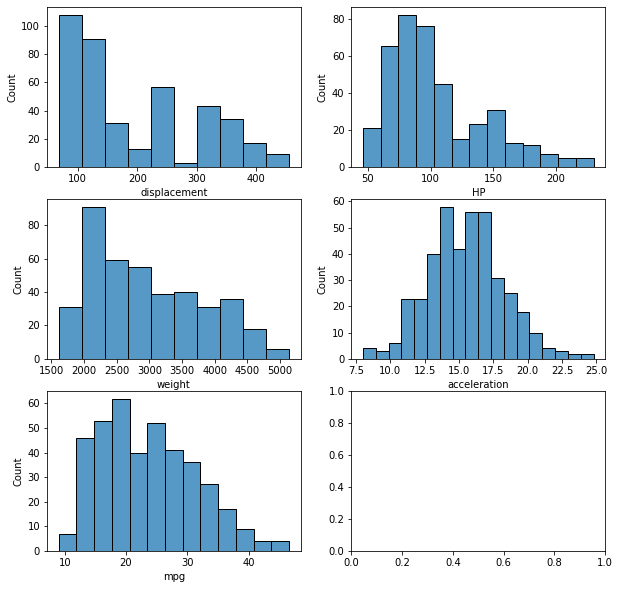

In [66]:
figure, ax=plt.subplots(3,2,figsize=(10,10))
sns.histplot(data['displacement'],ax=ax[0,0])
sns.histplot(data['HP'],ax=ax[0,1])
sns.histplot(data['weight'],ax=ax[1,0])
sns.histplot(data['acceleration'],ax=ax[1,1])
sns.histplot(data['mpg'],ax=ax[2,0])

plt.show(sns)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


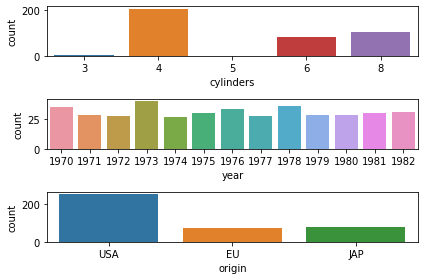

In [79]:
figure, ax=plt.subplots(nrows=3)
sns.countplot(data['cylinders'],ax=ax[0])
sns.countplot(data['year'],ax=ax[1])
sns.countplot(data['origin'],ax=ax[2])

plt.tight_layout()
plt.show(sns)

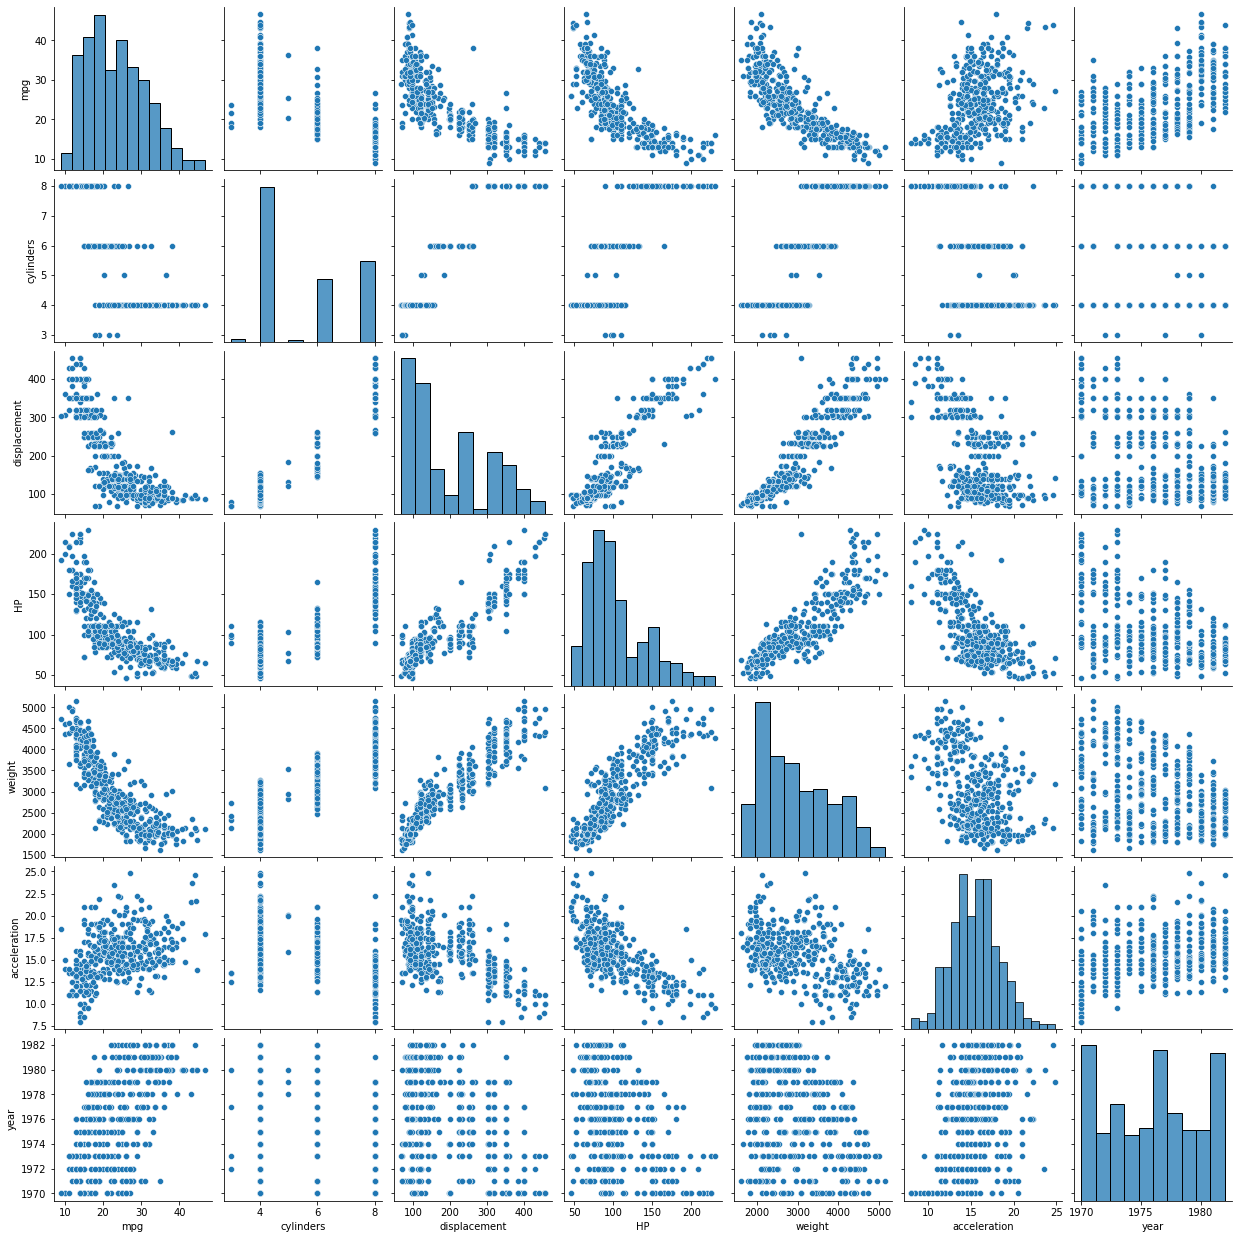

In [80]:
sns.pairplot(data)